# Spaceship Naive Bayes Submission

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Bring the Data In

In [ ]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [ ]:
X_submission.dtypes

PassengerId                   object
CryoSleep                      int64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Expenditure                  float64
NoSpending                     int64
Group                          int64
GroupSize                      int64
Solo                           int64
CabinRegion_1                  int64
CabinRegion_2                  int64
CabinRegion_3                  int64
CabinRegion_4                  int64
CabinRegion_5                  int64
CabinRegion_6                  int64
CabinRegion_7                  int64
FamilySize                     int64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
C

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Ini buat ganti y_train and y_test ke 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7823, 39)
(870, 39)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7823 entries, 7104 to 4533
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7823 non-null   object 
 1   CryoSleep                  7823 non-null   int64  
 2   VIP                        7823 non-null   int64  
 3   RoomService                7823 non-null   float64
 4   FoodCourt                  7823 non-null   float64
 5   ShoppingMall               7823 non-null   float64
 6   Spa                        7823 non-null   float64
 7   VRDeck                     7823 non-null   float64
 8   Expenditure                7823 non-null   float64
 9   NoSpending                 7823 non-null   int64  
 10  Group                      7823 non-null   int64  
 11  GroupSize                  7823 non-null   int64  
 12  Solo                       7823 non-null   int64  
 13  CabinRegion_1              7823 non-null   int64  

# Model Training

Naive Bayes Model Accuracy: 0.5575


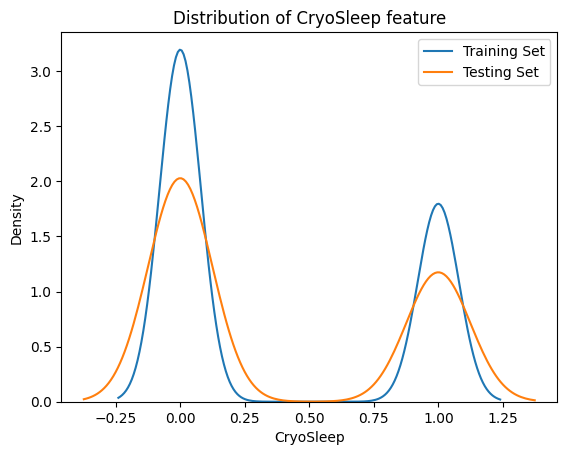

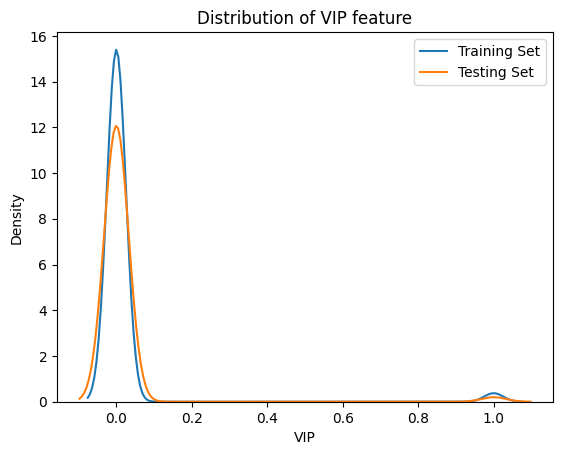

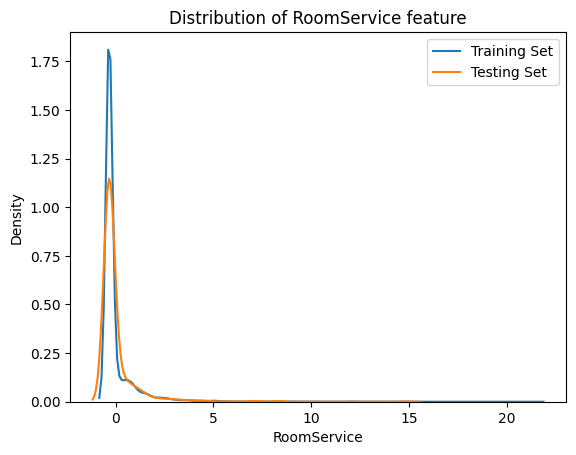

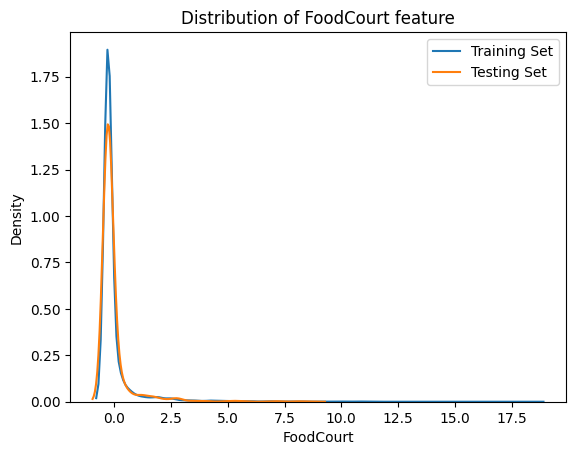

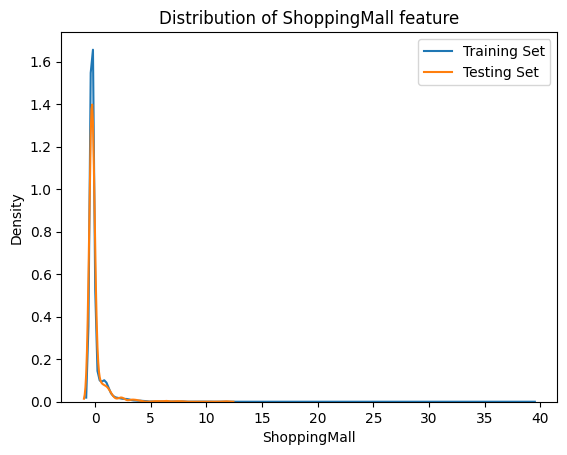

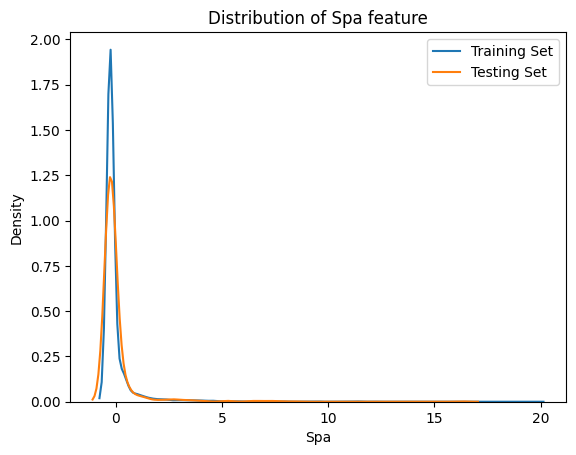

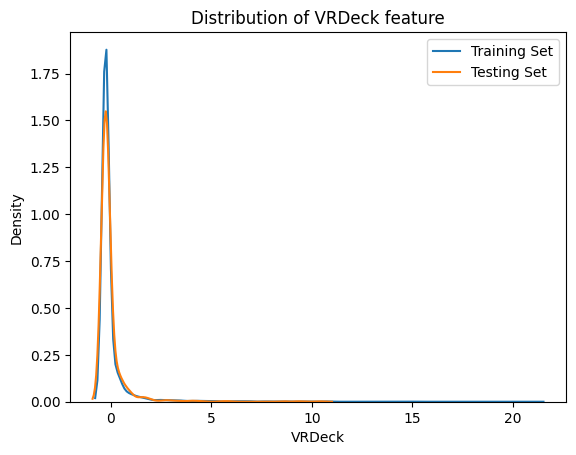

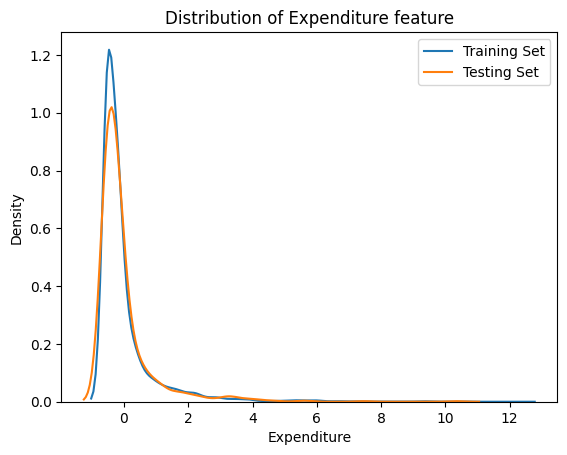

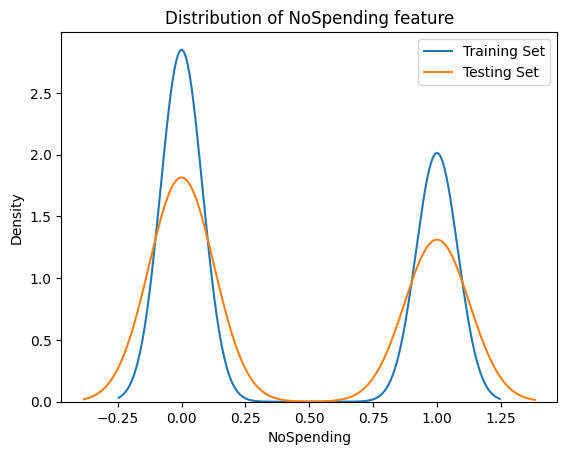

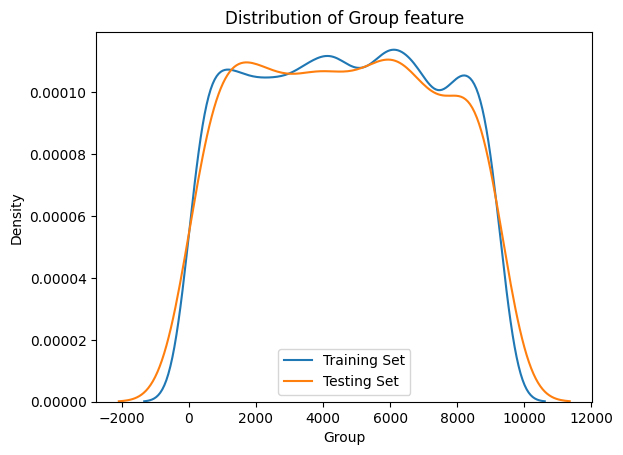

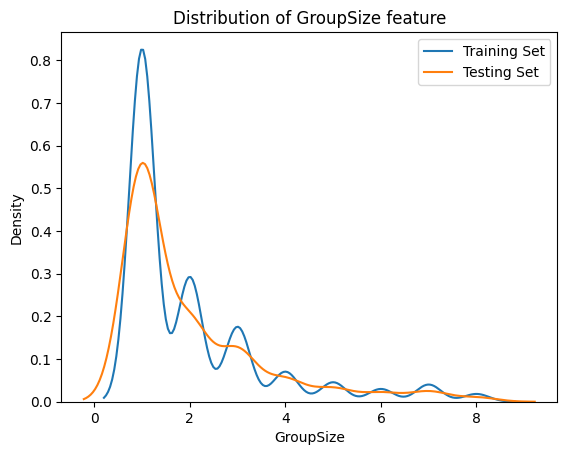

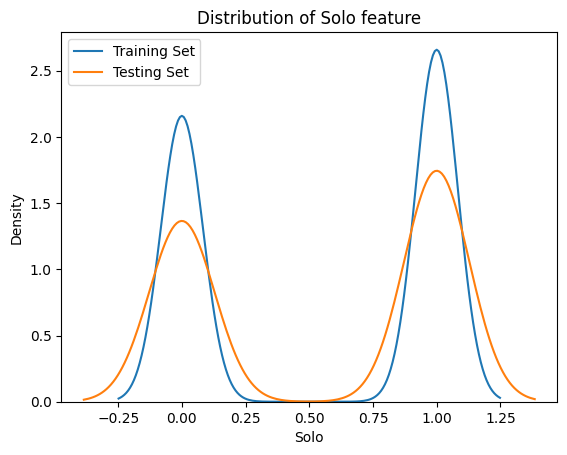

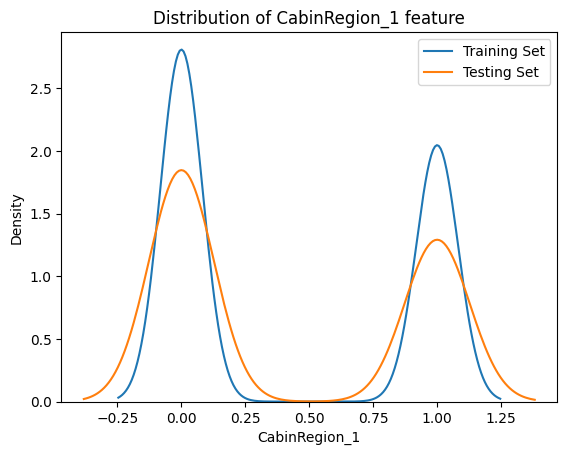

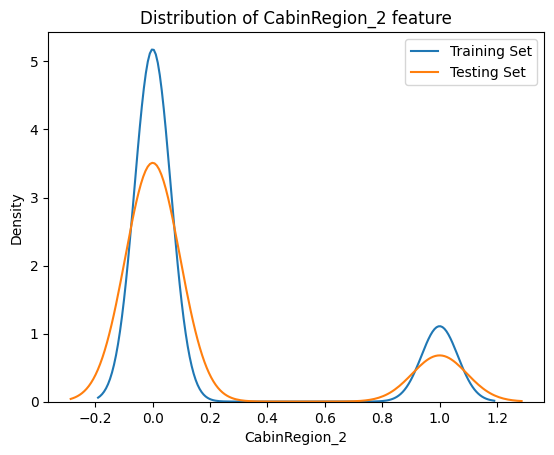

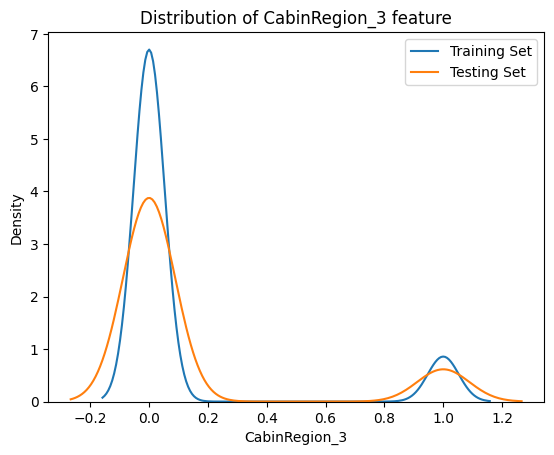

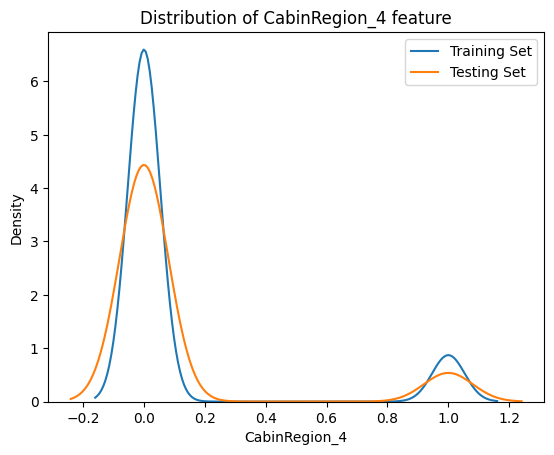

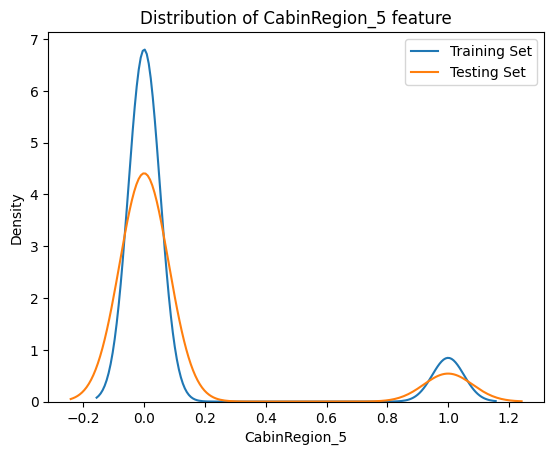

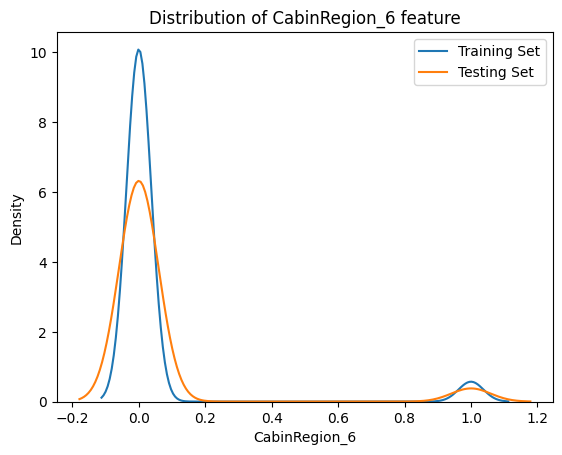

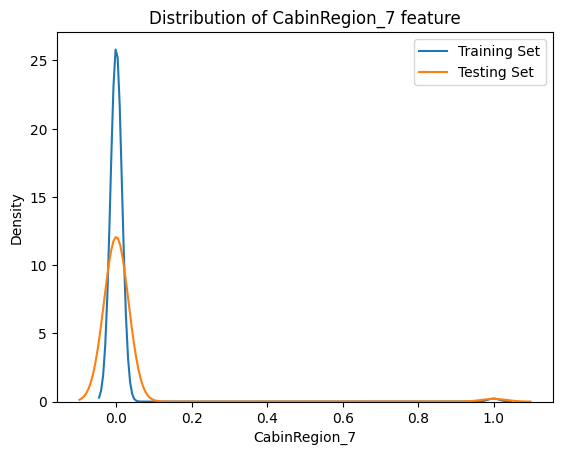

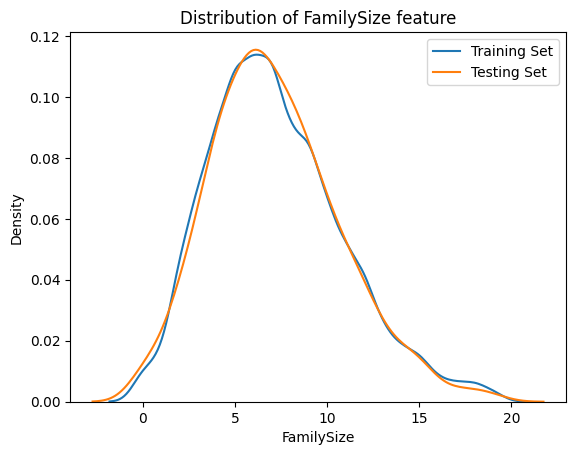

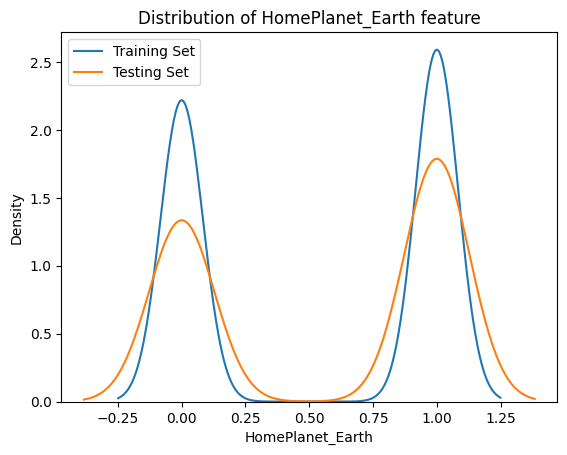

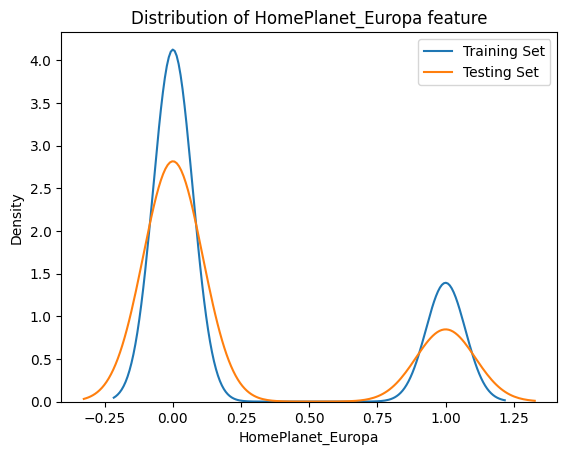

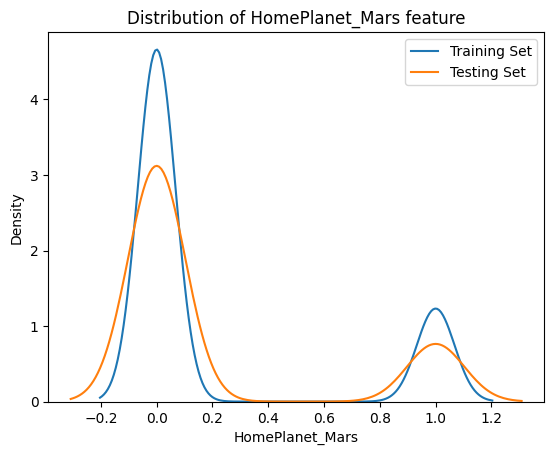

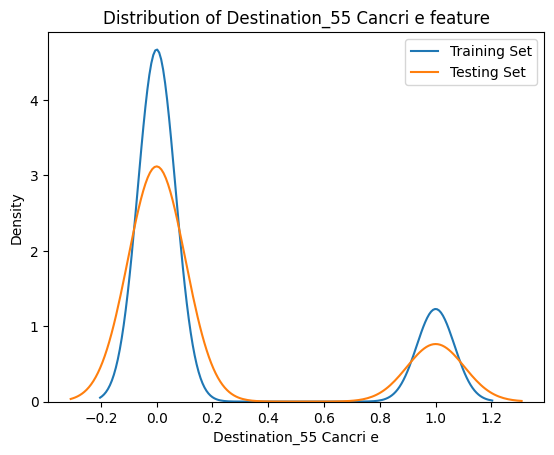

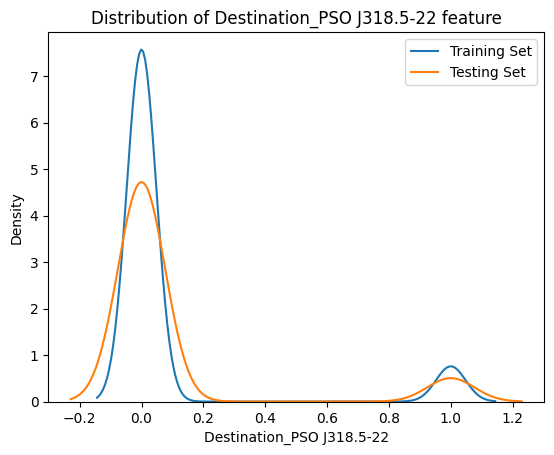

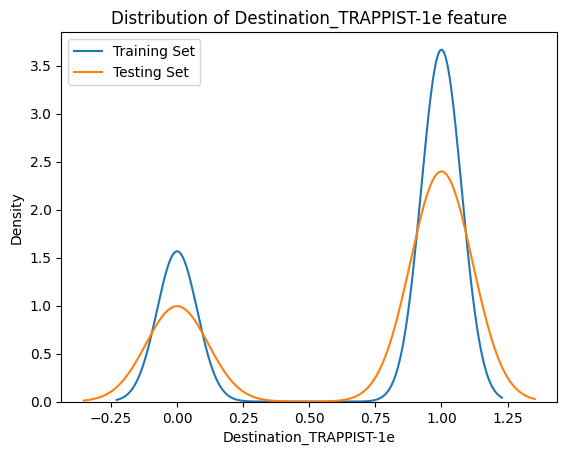

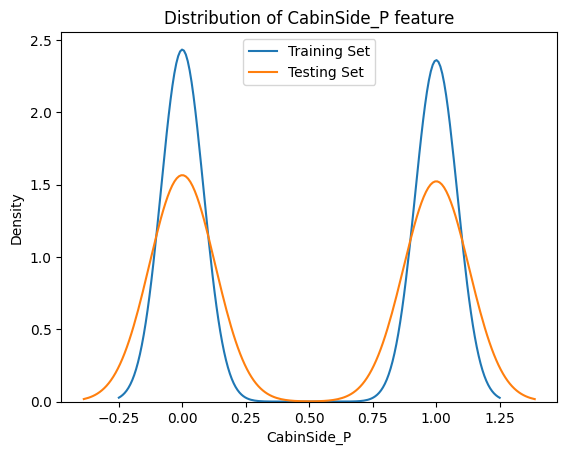

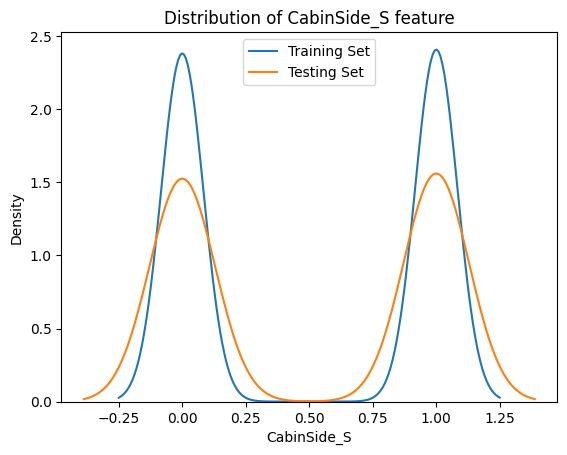

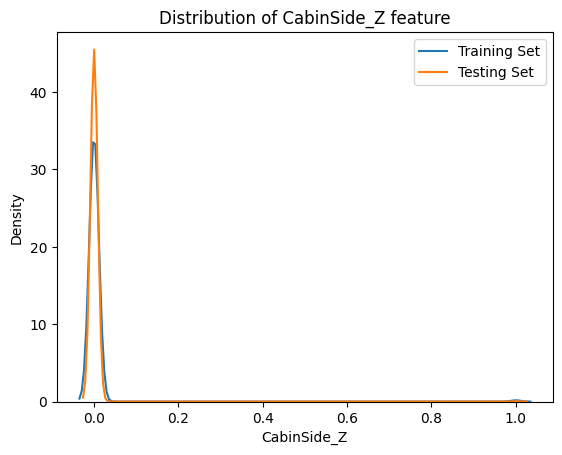

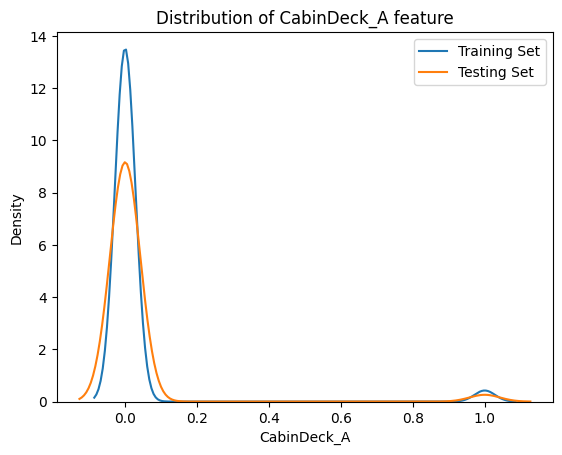

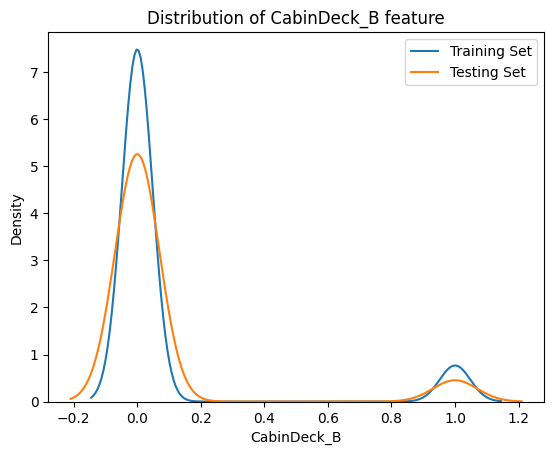

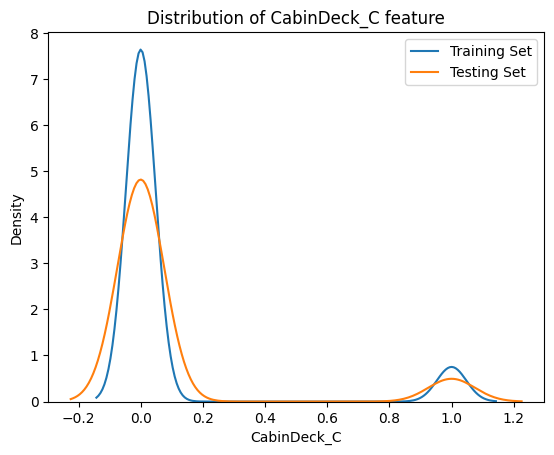

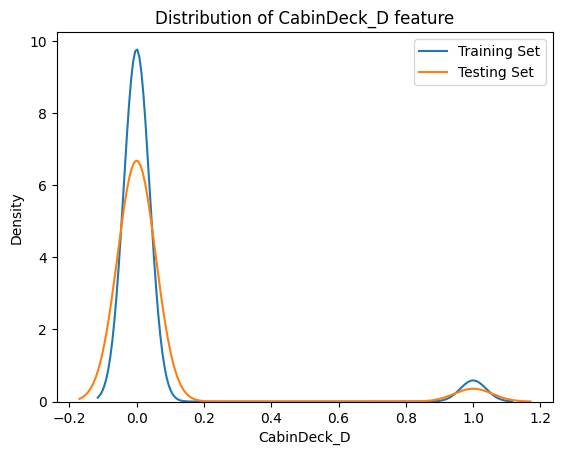

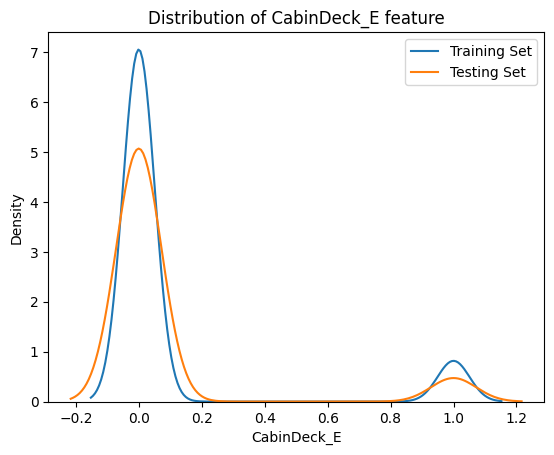

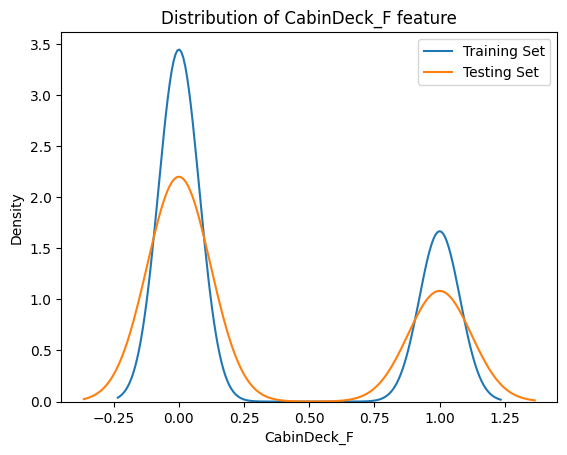

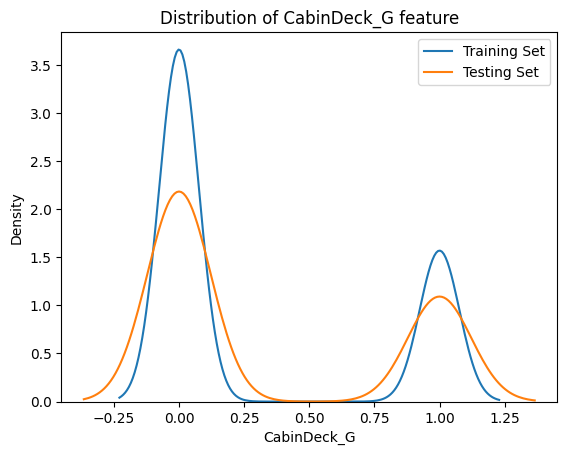

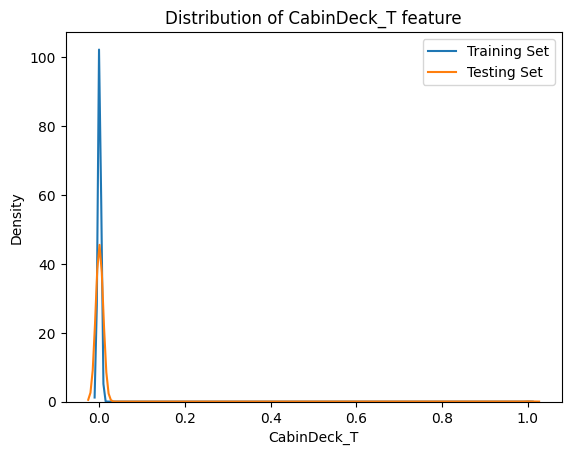

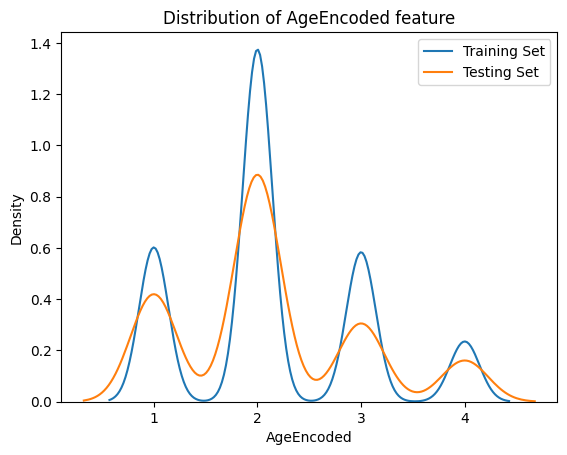

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy:.4f}")

numerical_features = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_features = [col for col in X_train.columns if col not in numerical_features]

for col in numerical_features:
    plt.figure()
    sns.kdeplot(X_train[col], label='Training Set')
    sns.kdeplot(X_test[col], label='Testing Set')
    plt.title(f"Distribution of {col} feature")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

## Takeaway

We will try hybrid gaussian and multinomial NB

# Submission Prediction

In [ ]:
# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
naive_bayes.fit(X_df, y_df['Transported'].values)

# Generate prediction for spaceship_test_X_v2.csv
y_prediction = naive_bayes.predict(X_submission)
print(y_prediction)

[0 0 0 ... 1 1 1]


In [ ]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [ ]:
submission_dict.to_csv('spaceship_nb_submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>